In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# Load Weight Data

##Load the data

In this code, we will load inbound, outbound, and transfer data.

In [ ]:
df_inbound = pd.read_excel('2023 Load Weights.xlsx', sheet_name='Inbound')
df_outbound = pd.read_excel('2023 Load Weights.xlsx', sheet_name='Outbound')
df_transfer = pd.read_excel('2023 Load Weights.xlsx', sheet_name='Transfer')

##Data Preview

To make sure we are using the correct data, we will preview the data.

In [ ]:
df_inbound.head()

,Calendar Year,Actual Date,Purchase Order Load Number,Gross Weight Received,Cube Received,Order Type
0,2023,2023-01-01,8747000,30660.000,1592.7600,Inbound
1,2023,2023-01-01,8870137,27118.740,620.8256,Inbound
2,2023,2023-01-01,8878560,24740.840,576.6244,Inbound
3,2023,2023-01-02,8883780,43381.000,993.1876,Inbound
4,2023,2023-01-02,8872187,41832.623,1113.7053,Inbound


In [ ]:
df_outbound.head()

,Calendar Year,Actual Date,Customer Load Number,Customer Extended Gross Weight,Customer Cube,Order Type
0,2023,2023-01-02,8872378,42529.05,1627.2585,Outbound
1,2023,2023-01-02,8871180,42398.26,1580.5559,Outbound
2,2023,2023-01-02,8872317,42281.47,1613.0141,Outbound
3,2023,2023-01-02,8870736,42128.37,1387.0211,Outbound
4,2023,2023-01-02,8870155,41899.98,1427.0059,Outbound


In [ ]:
df_transfer.head()

,Calendar Year,Actual Date,Load Number,Extended Gross Received Weight,Extended Received Cube,Load Type
0,2023,2023-01-01,8883020,20995.6000,1136.0717,Transfer
1,2023,2023-01-02,8863000,42935.0831,1631.3541,Transfer
2,2023,2023-01-02,8863295,42582.7961,1831.5028,Transfer
3,2023,2023-01-02,8863167,42463.7909,1912.3092,Transfer
4,2023,2023-01-02,8859856,42310.4561,1764.8808,Transfer


##Different Column Names


Here we will check the column names to make sure all of the are the same.

In [ ]:
print(df_inbound.columns)
print(df_outbound.columns)
print(df_transfer.columns)

Index(['Calendar Year', 'Actual Date', 'Purchase Order Load Number',
       'Gross Weight Received', 'Cube Received', 'Order Type'],
      dtype='object')
Index(['Calendar Year', 'Actual Date', 'Customer Load Number',
       'Customer Extended Gross Weight', 'Customer Cube', 'Order Type'],
      dtype='object')
Index(['Calendar Year', 'Actual Date', 'Load Number',
       'Extended Gross Received Weight', 'Extended Received Cube',
       'Load Type'],
      dtype='object')


There are some differences in column names across the dataframes. We will change them later. This will be an important step because once it is done we will be able to merge all of the tables.

##Dimension Check

Now we need to check their dimension. We are doing this to ensure that the number of columns are the same and to make sure that load number is unique in each table.

In [ ]:
print(df_inbound.shape)
print(df_inbound.nunique())

(101503, 6)
Calendar Year                      1
Actual Date                      346
Purchase Order Load Number    101503
Gross Weight Received          92572
Cube Received                  96300
Order Type                         1
dtype: int64


In [ ]:
print(df_outbound.shape)
print(df_outbound.nunique())

(108922, 6)
Calendar Year                          1
Actual Date                          264
Customer Load Number              108922
Customer Extended Gross Weight    106227
Customer Cube                     107816
Order Type                             1
dtype: int64


In [ ]:
print(df_transfer.shape)
print(df_transfer.nunique())

(50140, 6)
Calendar Year                         1
Actual Date                         348
Load Number                       50140
Extended Gross Received Weight    50098
Extended Received Cube            49869
Load Type                             1
dtype: int64


It is apparent that all of the load numbers are unique in each sheet.

##Table Summary Check

Now we check the table summary to see if null values are present and to find the specific types of data in each column.

In [ ]:
df_inbound.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Calendar Year               101503 non-null  int64         
 1   Actual Date                 101503 non-null  datetime64[ns]
 2   Purchase Order Load Number  101503 non-null  int64         
 3   Gross Weight Received       101503 non-null  float64       
 4   Cube Received               101503 non-null  float64       
 5   Order Type                  101503 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 4.6+ MB


In [ ]:
df_outbound.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108922 entries, 0 to 108921
Data columns (total 6 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Calendar Year                   108922 non-null  int64         
 1   Actual Date                     108922 non-null  datetime64[ns]
 2   Customer Load Number            108922 non-null  int64         
 3   Customer Extended Gross Weight  108922 non-null  float64       
 4   Customer Cube                   108922 non-null  float64       
 5   Order Type                      108922 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 5.0+ MB


In [ ]:
df_transfer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50140 entries, 0 to 50139
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Calendar Year                   50140 non-null  int64         
 1   Actual Date                     50140 non-null  datetime64[ns]
 2   Load Number                     50140 non-null  int64         
 3   Extended Gross Received Weight  50140 non-null  float64       
 4   Extended Received Cube          50140 non-null  float64       
 5   Load Type                       50140 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 2.3+ MB


None of them contain null values and they all have the right data type. We can see that load number is considered int by python, however this should not be a problem.

##Columns Name Adjustment



Now we will change the column names.

In [ ]:
df_inbound = df_inbound.rename(columns={'Purchase Order Load Number': 'Load Number', 'Gross Weight Received': 'Weight Received', 'Cube Received': 'Cubic'})
df_outbound = df_outbound.rename(columns={'Customer Load Number': 'Load Number', 'Customer Extended Gross Weight': 'Weight Received', 'Customer Cube': 'Cubic'})
df_transfer = df_transfer.rename(columns={'Load Number': 'Load Number', 'Extended Gross Received Weight': 'Weight Received', 'Extended Received Cube': 'Cubic', 'Load Type': 'Order Type'})

Now, let's make sure the rename is sucessful.

In [ ]:
print(df_inbound.columns)
print(df_outbound.columns)
print(df_transfer.columns)

Index(['Calendar Year', 'Actual Date', 'Load Number', 'Weight Received',
       'Cubic', 'Order Type'],
      dtype='object')
Index(['Calendar Year', 'Actual Date', 'Load Number', 'Weight Received',
       'Cubic', 'Order Type'],
      dtype='object')
Index(['Calendar Year', 'Actual Date', 'Load Number', 'Weight Received',
       'Cubic', 'Order Type'],
      dtype='object')


##Intersection between the tables

Now we will check for intersection

In [ ]:
df_intersection_inbound_outbound = pd.merge(df_inbound, df_outbound, on='Load Number', how='inner')
print(df_intersection_inbound_outbound.shape)
print(df_inbound.shape)

(72830, 11)
(101503, 6)


In [ ]:
df_intersection_inbound_transfer = pd.merge(df_inbound, df_transfer, on='Load Number', how='inner')
print(df_intersection_inbound_transfer.shape)
print(df_inbound.shape)

(41, 11)
(101503, 6)


In [ ]:
df_intersection_outbound_transfer = pd.merge(df_transfer, df_outbound, on='Load Number', how='inner')
print(df_intersection_outbound_transfer.shape)
print(df_outbound.shape)

(103, 11)
(108922, 6)


There are intersection of load number between inbound, outbound, and transfer. But we will not delete them since they are considered different deliveries

##Statistic Descripstion

Now we will check their statistic description

In [ ]:
df_outbound.describe()

,Calendar Year,Actual Date,Load Number,Weight Received,Cubic
count,108922.0,108922,1.089220e+05,108922.000000,108922.000000
mean,2023.0,2023-07-01 19:47:09.511026176,9.252839e+06,29101.787086,1481.545586
min,2023.0,2023-01-02 00:00:00,3.017515e+06,1.860000,0.111500
25%,2023.0,2023-04-03 00:00:00,9.068243e+06,24169.310000,1311.394775
50%,2023.0,2023-07-03 00:00:00,9.254718e+06,31072.750000,1573.004150
75%,2023.0,2023-09-28 00:00:00,9.436965e+06,36140.290000,1772.282650
max,2023.0,2023-12-29 00:00:00,9.675659e+06,57311.090000,7060.336300
std,0.0,NaN,2.420953e+05,9070.630951,401.935338


In [ ]:
df_inbound.describe()

,Calendar Year,Actual Date,Load Number,Weight Received,Cubic
count,101503.0,101503,1.015030e+05,101503.000000,101503.000000
mean,2023.0,2023-07-01 14:56:09.855077888,9.257948e+06,26091.396019,1256.709764
min,2023.0,2023-01-01 00:00:00,1.867988e+06,3.720000,0.260000
25%,2023.0,2023-04-03 00:00:00,9.068438e+06,17325.309000,842.936350
50%,2023.0,2023-06-30 00:00:00,9.255395e+06,26949.530000,1178.771000
75%,2023.0,2023-09-29 00:00:00,9.443322e+06,36389.415000,1669.708500
max,2023.0,2023-12-31 00:00:00,9.681336e+06,59121.670000,5858.520000
std,0.0,NaN,2.201216e+05,11089.827892,598.015828


In [ ]:
df_transfer.describe()

,Calendar Year,Actual Date,Load Number,Weight Received,Cubic
count,50140.0,50140,5.014000e+04,50140.000000,50140.000000
mean,2023.0,2023-07-03 03:47:56.840845568,9.261876e+06,31384.620459,1659.383213
min,2023.0,2023-01-01 00:00:00,8.859797e+06,1.700000,0.175000
25%,2023.0,2023-04-04 00:00:00,9.078403e+06,27606.554675,1620.443375
50%,2023.0,2023-07-05 00:00:00,9.264306e+06,33360.940300,1761.142200
75%,2023.0,2023-10-02 00:00:00,9.449927e+06,37611.744525,1864.220700
max,2023.0,2023-12-31 00:00:00,9.669067e+06,55095.974400,5327.763900
std,0.0,NaN,2.186082e+05,8162.572466,345.045783


In all table, more than 75% of the product delivered is less than 39000 pounds. Note that the maximum weights of each trucks is 44000, which means more than 75% delivery could be delivered with EV trailer trucks. It is reasonable to assume 75% of the trucks delivered 75% of the products, which means we could transition around 75% of the trucks to EV Trailer

#Basic Visualize Load Weight Data

##Weight Distribution

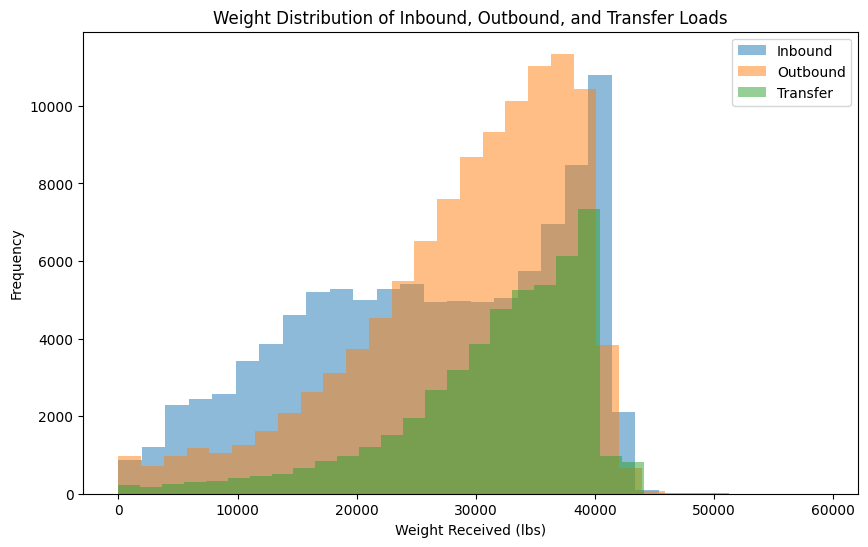

In [ ]:
# prompt: Weight Distriution of inbound outbound and transfer

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms for inbound, outbound, and transfer weights
ax.hist(df_inbound['Weight Received'], bins=30, alpha=0.5, label='Inbound')
ax.hist(df_outbound['Weight Received'], bins=30, alpha=0.5, label='Outbound')
ax.hist(df_transfer['Weight Received'], bins=30, alpha=0.5, label='Transfer')

# Customize the plot
ax.set_xlabel('Weight Received (lbs)')
ax.set_ylabel('Frequency')
ax.set_title('Weight Distribution of Inbound, Outbound, and Transfer Loads')
ax.legend()

# Show the plot
plt.show()

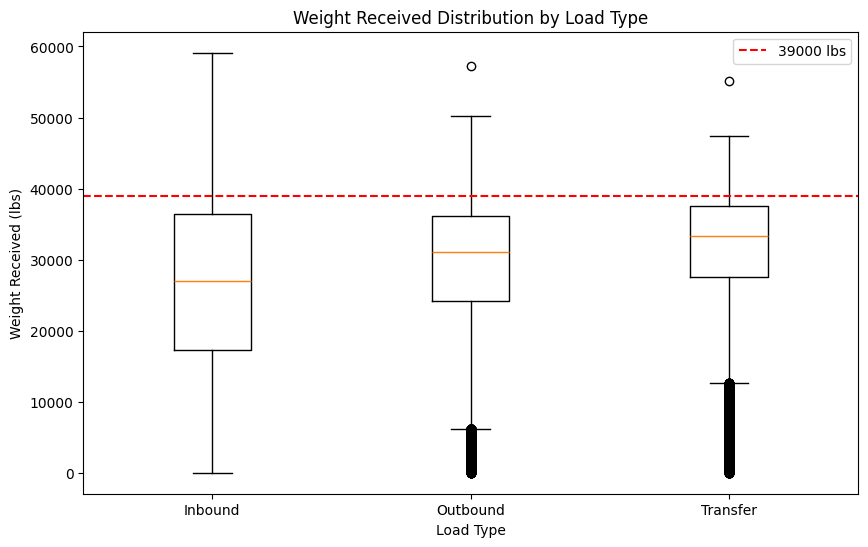

In [ ]:
# prompt: Create a boxplot for df_inbound df_outbound df_transfer for the column Weight_Recieved. add line for 39000

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a boxplot for Weight Received for Inbound, Outbound, and Transfer
data = [df_inbound['Weight Received'], df_outbound['Weight Received'], df_transfer['Weight Received']]
labels = ['Inbound', 'Outbound', 'Transfer']
ax.boxplot(data, labels=labels)

# Add a line at 39000
ax.axhline(y=39000, color='red', linestyle='--', label='39000 lbs')

# Customize the plot
ax.set_xlabel('Load Type')
ax.set_ylabel('Weight Received (lbs)')
ax.set_title('Weight Received Distribution by Load Type')
ax.legend()

# Show the plot
plt.show()

##Cubic Distribution

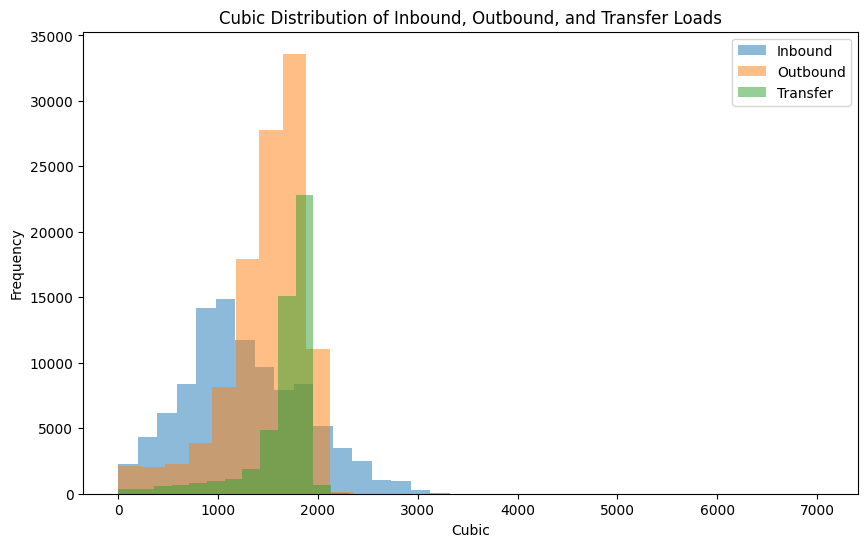

In [ ]:
# prompt: Weight Distriution of inbound outbound and transfer

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms for inbound, outbound, and transfer weights
ax.hist(df_inbound['Cubic'], bins=30, alpha=0.5, label='Inbound')
ax.hist(df_outbound['Cubic'], bins=30, alpha=0.5, label='Outbound')
ax.hist(df_transfer['Cubic'], bins=30, alpha=0.5, label='Transfer')

# Customize the plot
ax.set_xlabel('Cubic')
ax.set_ylabel('Frequency')
ax.set_title('Cubic Distribution of Inbound, Outbound, and Transfer Loads')
ax.legend()

# Show the plot
plt.show()

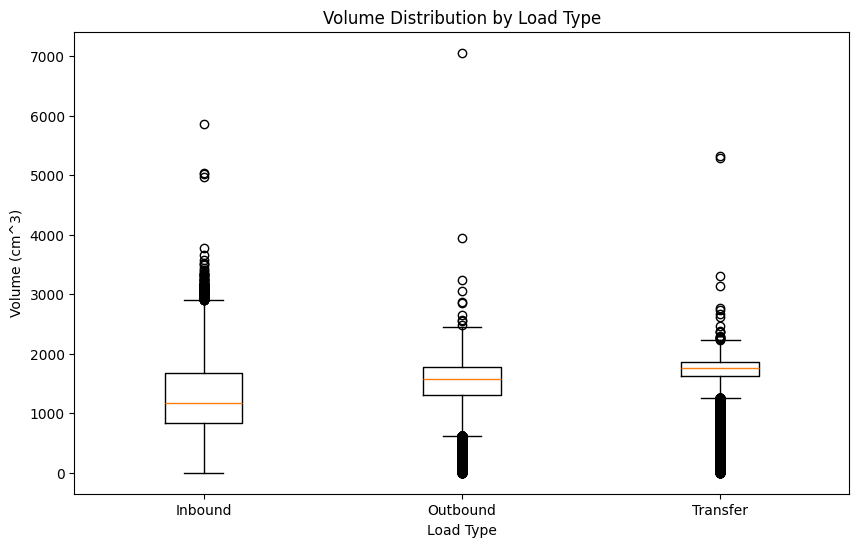

In [ ]:
# prompt: Create a boxplot for df_inbound df_outbound df_transfer for the column Weight_Recieved. add label

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create boxplots for each DataFrame
ax.boxplot([df_inbound['Cubic'], df_outbound['Cubic'], df_transfer['Cubic']], labels=['Inbound', 'Outbound', 'Transfer'])

# Customize the plot
ax.set_xlabel('Load Type')
ax.set_ylabel('Volume (cm^3)')
ax.set_title('Volume Distribution by Load Type')

# Show the plot
plt.show()

#Lanes Data

##Load the data

Now we will do the same analysis to lanes data

In [ ]:
df_lanes = pd.read_excel('All 2023 Lanes.xlsx', sheet_name='Data')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


##Data Preview

Preview the data to make sure we are using the correct data

In [ ]:
df_lanes.head()

,Load Number,Load Date,Period,Year,Driver Location,Driver#,Driver Name,Mileage Type,Miles,Start Location,City,State,End Location,City.1,State.1,Total DCs,Location Lane,"City, State Lane"
0,8878416,2023-01-06 17:33:38,1,2023,BDE,40543,DOUGLAS COOK,Other,290,DOT FOODS - NY,LIVERPOOL,NY,DOT FOODS - DE,Bear,DE,6,DOT FOODS - NY - DOT FOODS - DE,"LIVERPOOL, NY - Bear, DE"
1,8878416,2023-01-06 17:33:38,1,2023,BDE,40543,DOUGLAS COOK,Empty,290,DOT FOODS - DE,Bear,DE,DOT FOODS - NY,LIVERPOOL,NY,6,DOT FOODS - DE - DOT FOODS - NY,"Bear, DE - LIVERPOOL, NY"
2,8878416,2023-01-06 17:33:38,1,2023,BDE,40543,DOUGLAS COOK,Other,290,DOT FOODS - NY,LIVERPOOL,NY,DOT FOODS - DE,Bear,DE,6,DOT FOODS - NY - DOT FOODS - DE,"LIVERPOOL, NY - Bear, DE"
3,8927168,2023-01-18 07:00:00,1,2023,BAZ,33804,JOSHUA MAYFIELD,Other,1613,DOT FOODS - AZ,BULLHEAD CITY,AZ,DOT FOODS - IL,Mount Sterling,IL,6,DOT FOODS - AZ - DOT FOODS - IL,"BULLHEAD CITY, AZ - Mount Sterling, IL"
4,8927168,2023-01-18 07:00:00,1,2023,BAZ,33804,JOSHUA MAYFIELD,Other,231,DOT FOODS - IL,Mount Sterling,IL,DOT FOODS - CHICAGO,University Park,IL,6,DOT FOODS - IL - DOT FOODS - CHICAGO,"Mount Sterling, IL - University Park, IL"


##Column Names

Check the columns names

In [ ]:
print(df_lanes.columns)

Index(['Load Number', 'Load Date', 'Period', 'Year', 'Driver Location',
       'Driver#', 'Driver Name', 'Mileage Type', 'Miles', 'Start Location',
       'City', 'State', 'End Location', 'City.1', 'State.1', 'Total DCs',
       'Location Lane', 'City, State Lane'],
      dtype='object')


##Dimension Check and Unique values check

check dimension and unique values. to make sure load number are unique

In [ ]:
print(df_lanes.shape)
print(df_lanes.nunique())

(549688, 18)
Load Number         259508
Load Date           138014
Period                  13
Year                     1
Driver Location         17
Driver#               2324
Driver Name           2353
Mileage Type             2
Miles                 1869
Start Location       10607
City                  2873
State                   56
End Location         10693
City.1                3011
State.1                 56
Total DCs                6
Location Lane        92570
City, State Lane     44423
dtype: int64


The load number is not unique, there are many duplicates. This is because each rows is documented between distribution center. Hence, duplicate load number, but different routes in each of them(typically the top rows of duplicates rows is the starting point, the bottom one is the end point) To counter this we will group by the by each load number.

In [ ]:
df_lanes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549688 entries, 0 to 549687
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Load Number       549688 non-null  int64         
 1   Load Date         549688 non-null  datetime64[ns]
 2   Period            549688 non-null  int64         
 3   Year              549688 non-null  int64         
 4   Driver Location   549688 non-null  object        
 5   Driver#           549688 non-null  int64         
 6   Driver Name       549688 non-null  object        
 7   Mileage Type      549688 non-null  object        
 8   Miles             549688 non-null  int64         
 9   Start Location    549686 non-null  object        
 10  City              549686 non-null  object        
 11  State             549686 non-null  object        
 12  End Location      549688 non-null  object        
 13  City.1            549688 non-null  object        
 14  Stat

no null values are found. all of the data has the correct data type

##Statistic Description

Now we will describe the lanes data statiscally

In [ ]:
df_lanes.describe()

,Load Number,Load Date,Period,Year,Driver#,Miles,Total DCs
count,5.496880e+05,549688,549688.000000,549688.0,549688.000000,549688.000000,549688.000000
mean,9.260215e+06,2023-07-01 10:42:29.353458432,6.969015,2023.0,32720.120336,253.941803,1.838476
min,7.395508e+06,2023-01-01 00:01:00,1.000000,2023.0,1023.000000,1.000000,1.000000
25%,9.072012e+06,2023-04-01 11:28:01.249999872,4.000000,2023.0,25876.000000,59.000000,2.000000
50%,9.259958e+06,2023-07-02 13:00:00,7.000000,2023.0,33350.000000,168.000000,2.000000
75%,9.446519e+06,2023-09-29 15:01:00,10.000000,2023.0,42267.000000,333.000000,2.000000
max,9.910195e+06,2023-12-30 23:56:21,13.000000,2023.0,47342.000000,3025.000000,6.000000
std,2.187681e+05,NaN,3.721026,0.0,10153.298966,292.579102,0.500351


From the miles, around 50% of the deliveries are around more than 168 miles. Since the optimal use of Electric Vehicle trailer is 180 Miles, Dot Foods we were transioning to EV trucks, only around 50% of the lanes will be benefited. The other 50% will also be benefitted from electric trailer, but not as much as the other 50%. Especially since after 180 Miles, the performances will drop, however they will still be 30% more efficient than diesel trucks

#Basic Visualization Lanes Data

##Miles Distribution

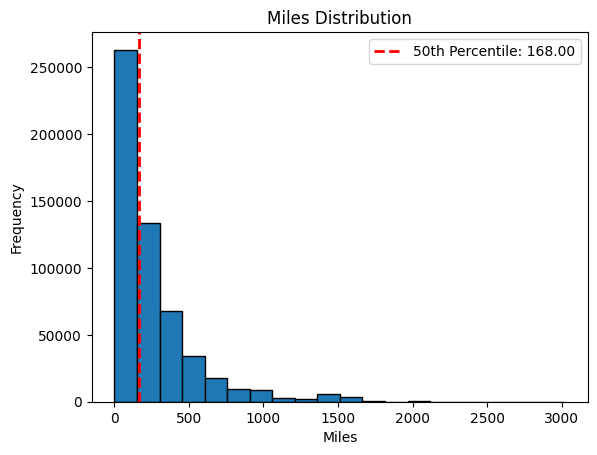

In [ ]:
# prompt: create the miles distribution from df_lanes without group by. add a line of 50% of the data with the label with the exact value.

import matplotlib.pyplot as plt

# Assuming 'df_lanes' is your DataFrame and 'Miles' is the column containing miles data
miles_data = df_lanes['Miles']

# Create a histogram of the miles distribution
plt.hist(miles_data, bins=20, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.title('Miles Distribution')

# Calculate the 50th percentile (median)
median_miles = np.percentile(miles_data, 50)

# Add a vertical line at the 50th percentile
plt.axvline(median_miles, color='red', linestyle='dashed', linewidth=2, label=f'50th Percentile: {median_miles:.2f}')

plt.legend()
plt.show()

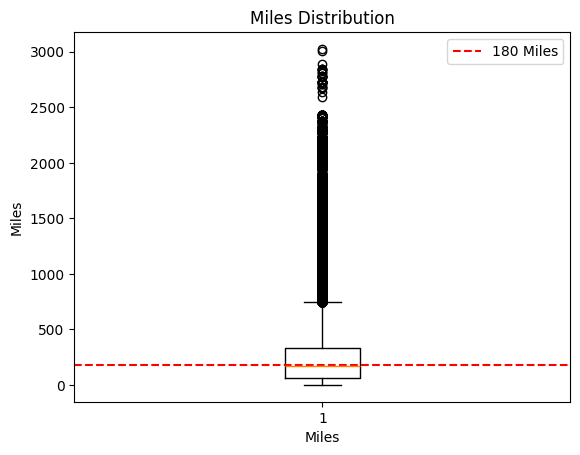

In [ ]:
# prompt: Boxplot of miles in df_lanes. show the line for 180 miles and the label for the line

# Assuming 'df_lanes' is your DataFrame and 'Miles' is the column containing miles data
miles_data = df_lanes['Miles']

# Create a boxplot of the miles distribution
plt.boxplot(miles_data)
plt.xlabel('Miles')
plt.ylabel('Miles')
plt.title('Miles Distribution')

# Add a horizontal line at 180 miles
plt.axhline(y=180, color='red', linestyle='--', label='180 Miles')

# Add a label for the line
plt.legend()

# Show the plot
plt.show()

##Start State Distribution

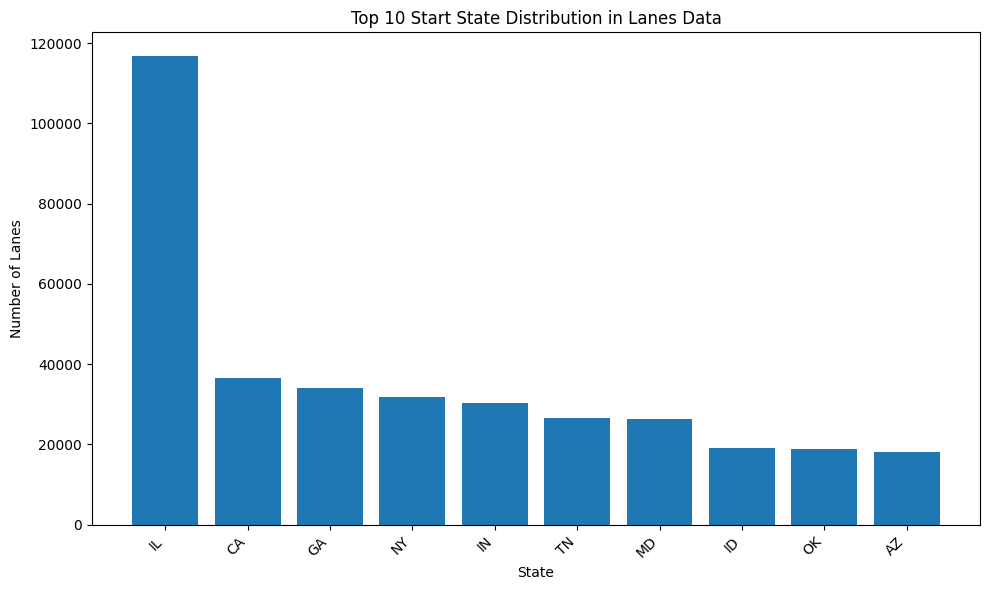

In [ ]:
# prompt: Distribution of state in df_lanes, visualize. top 10 only

# Assuming df_lanes is your DataFrame
state_counts = df_lanes['State'].value_counts()

# Select only the top 10 states
top_10_states = state_counts.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_states.index, top_10_states.values)
plt.xlabel('State')
plt.ylabel('Number of Lanes')
plt.title('Top 10 Start State Distribution in Lanes Data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

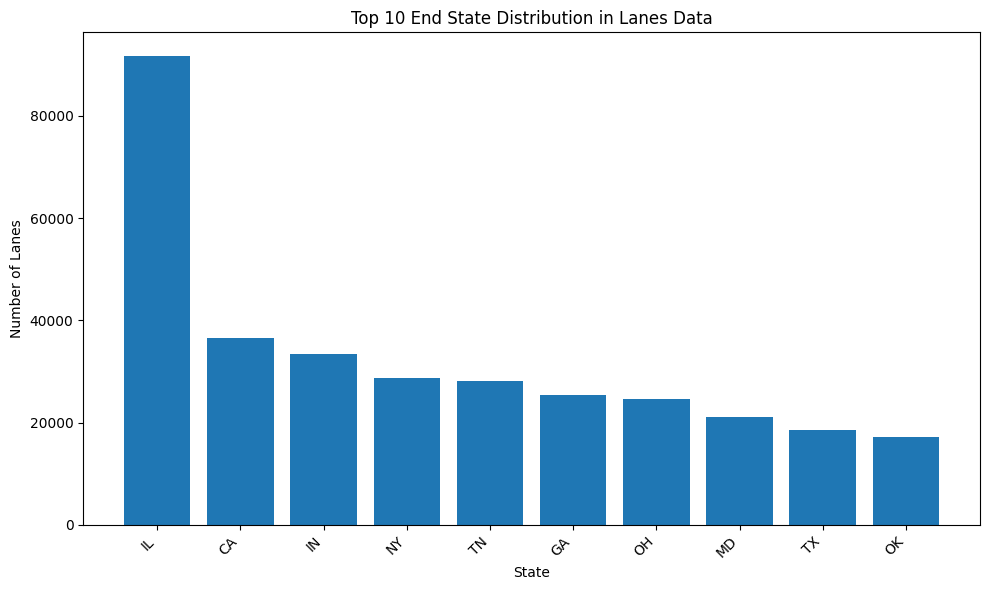

In [ ]:
# prompt: Distribution of state in df_lanes, visualize. top 10 only

# Assuming df_lanes is your DataFrame
state_counts = df_lanes['State.1'].value_counts()

# Select only the top 10 states
top_10_states = state_counts.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_states.index, top_10_states.values)
plt.xlabel('State')
plt.ylabel('Number of Lanes')
plt.title('Top 10 End State Distribution in Lanes Data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

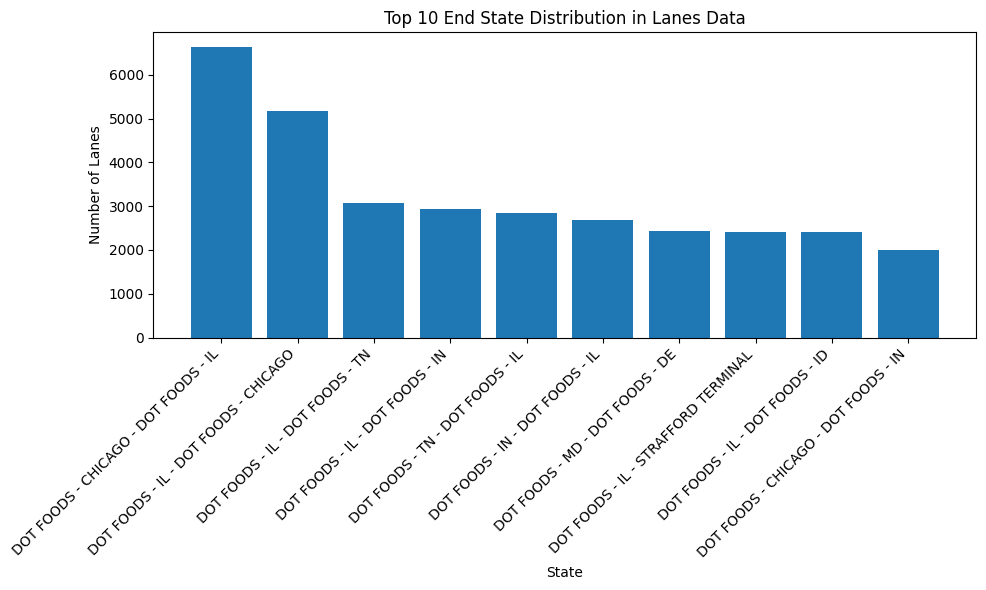

In [ ]:
# prompt: Distribution of state in df_lanes, visualize. top 10 only

# Assuming df_lanes is your DataFrame
state_counts = df_lanes['Location Lane'].value_counts()

# Select only the top 10 states
top_10_states = state_counts.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_states.index, top_10_states.values)
plt.xlabel('State')
plt.ylabel('Number of Lanes')
plt.title('Top 10 Most Actives Lanes Based on Trips')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

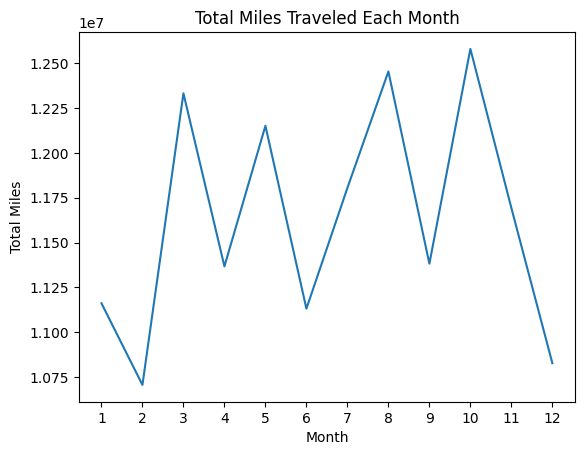

In [ ]:
# prompt: Make a linechart of sum of miles each month from df_lanes

# Assuming df_lanes is your DataFrame
df_lanes['Month'] = pd.to_datetime(df_lanes['Load Date']).dt.month

# Group by month and calculate the sum of miles for each month
monthly_miles = df_lanes.groupby('Month')['Miles'].sum()

# Create a line chart
plt.plot(monthly_miles.index, monthly_miles.values)
plt.xlabel('Month')
plt.ylabel('Total Miles')
plt.title('Total Miles Traveled Each Month')
plt.xticks(monthly_miles.index)  # Ensure x-axis ticks are the months
plt.show()

#Concat Inbound, Outbound, and Transfer

##Concat the tables

Concat outbound, inbound, and transfer, while keeping the duplicate

In [ ]:
df_outbound_inbound = pd.concat([df_outbound, df_inbound])
df_load_weight = pd.concat([df_outbound_inbound, df_transfer])

Check the concat result

In [ ]:
df_load_weight.head()

,Calendar Year,Actual Date,Load Number,Weight Received,Cubic,Order Type
0,2023,2023-01-02,8872378,42529.05,1627.2585,Outbound
1,2023,2023-01-02,8871180,42398.26,1580.5559,Outbound
2,2023,2023-01-02,8872317,42281.47,1613.0141,Outbound
3,2023,2023-01-02,8870736,42128.37,1387.0211,Outbound
4,2023,2023-01-02,8870155,41899.98,1427.0059,Outbound


##Concat Dimension

check the concat dimension, making sure it is consistent when done manually

In [ ]:
print(df_load_weight.shape)
print(df_inbound.shape[0] + df_outbound.shape[0] + df_transfer.shape[0])

(260565, 6)
260565


##Concat Missing Values

Check for missing value and data type

In [ ]:
df_load_weight.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260565 entries, 0 to 50139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Calendar Year    260565 non-null  int64         
 1   Actual Date      260565 non-null  datetime64[ns]
 2   Load Number      260565 non-null  int64         
 3   Weight Received  260565 non-null  float64       
 4   Cubic            260565 non-null  float64       
 5   Order Type       260565 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 13.9+ MB


In [ ]:
df_load_weight.isna().sum()

,0
Calendar Year,0
Actual Date,0
Load Number,0
Weight Received,0
Cubic,0
Order Type,0


#Lanes table Group By

##Group By

Group by lanes table by miles

In [ ]:
df_lanes_sum = df_lanes.groupby(['Load Number', 'Location Lane', 'City, State Lane', 'State', 'City', 'State.1', 'City.1', 'Mileage Type'])['Miles'].sum().reset_index()

Check the result

In [ ]:
df_lanes_sum.head()

,Load Number,Location Lane,"City, State Lane",State,City,State.1,City.1,Mileage Type,Miles
0,7395508,DOT FOODS - IL - JOE'S TEST TURN,"Mount Sterling, IL - Quincy, IL",IL,Mount Sterling,IL,Quincy,Other,41
1,7395508,JOE'S TEST TURN - DOT FOODS - IL,"Quincy, IL - Mount Sterling, IL",IL,Quincy,IL,Mount Sterling,Empty,41
2,8093737,DOT FOODS - OK - TULSA TERMINAL,"Ardmore, OK - Tulsa, OK",OK,Ardmore,OK,Tulsa,Empty,218
3,8219342,DOT FOODS - OK - PILOT,"Ardmore, OK - Caddo Valley, AR",OK,Ardmore,AR,Caddo Valley,Other,269
4,8253894,DOT FOODS - MD - M R WILLIAMS,"Williamsport, MD - Henderson, NC",MD,Williamsport,NC,Henderson,Other,286


##Match Group by result with Concat Table

match the load weight table, which was previously concated, with group by lanes

In [ ]:
df_lanes_weight = pd.merge(df_load_weight, df_lanes_sum,  on='Load Number', how='left')

To check which one has missing values from weight table

In [ ]:
#df_lanes_weight_missing = df_lanes_weight[df_lanes_weight['Weight Received'].isna()]
#df_lanes_weight_available = df_lanes_weight[df_lanes_weight['Weight Received'].notna()]

check the result of the merge

In [ ]:
df_lanes_weight.head()

,Calendar Year,Actual Date,Load Number,Weight Received,Cubic,Order Type,Location Lane,"City, State Lane",State,City,State.1,City.1,Mileage Type,Miles
0,2023,2023-01-02,8872378,42529.05,1627.2585,Outbound,DOT FOODS - TN - PON FOOD CORP.,"Dyersburg, TN - Ponchatoula, LA",TN,Dyersburg,LA,Ponchatoula,Other,419.0
1,2023,2023-01-02,8872378,42529.05,1627.2585,Outbound,MEYERS WAREHOUSE - DOT FOODS - TN,"New Orleans, LA - Dyersburg, TN",LA,New Orleans,TN,Dyersburg,Other,482.0
2,2023,2023-01-02,8872378,42529.05,1627.2585,Outbound,PON FOOD CORP. - MEYERS WAREHOUSE,"Ponchatoula, LA - New Orleans, LA",LA,Ponchatoula,LA,New Orleans,Empty,51.0
3,2023,2023-01-02,8871180,42398.26,1580.5559,Outbound,BUSH BROTHERS & CO - DOT FOODS - IL,"Dandridge, TN - Mount Sterling, IL",TN,Dandridge,IL,Mount Sterling,Other,632.0
4,2023,2023-01-02,8871180,42398.26,1580.5559,Outbound,DOT FOODS - IN - USF/KNOXVILLE,"Cambridge City, IN - Alcoa, TN",IN,Cambridge City,TN,Alcoa,Other,337.0


#Nan values in df_lanes_weight

##Check Nan Values

It appears there are nan values in miles. Let us check them

In [ ]:
df_lanes_weight.isna().sum()

,0
Calendar Year,0
Actual Date,0
Load Number,0
Weight Received,0
Cubic,0
Order Type,0
Location Lane,27620
"City, State Lane",27620
State,27620
City,27620


there seems to be many nan in the miles. lets fill them with either median/or mean. But first we need to check the distribution to determine to use median or mean

##Distribution of miles

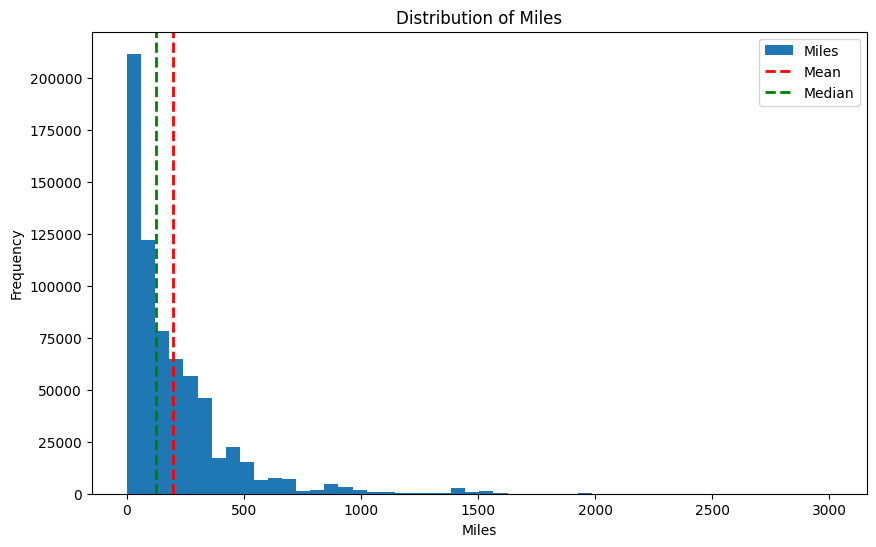

In [ ]:
# Create a histogram of the 'Miles' column
ax = df_lanes_weight['Miles'].plot(kind='hist', bins=50, figsize=(10, 6))

# Calculate the mean and median
mean_miles = df_lanes_weight['Miles'].mean()
median_miles = df_lanes_weight['Miles'].median()

# Add vertical lines for the mean and median
plt.axvline(mean_miles, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_miles, color='green', linestyle='dashed', linewidth=2, label='Median')

# Add labels and title
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.title('Distribution of Miles')

# Add a legend
plt.legend()

# Show the plot
plt.show()


the distribution is skewed. hence we will use median to fill the nan

In [ ]:
df_lanes_weight['Miles'] = df_lanes_weight['Miles'].fillna(median_miles)

#Range Experiment Result

read the range experiment result

In [ ]:
df_experiment = pd.read_excel('Range Test Results.xlsx', sheet_name='Sheet1').sort_values(by=['Miles'])

check the result

In [ ]:
df_experiment

,Miles,MPG,Fuel Used (gallons),Weight,Smart/not
3,86.40,12.80,7.19,38090,1
8,86.40,8.30,10.49,43950,0
4,175.76,11.91,14.76,38090,1
9,175.76,7.40,23.00,43950,0
0,201.00,11.32,17.76,38090,1
5,201.00,8.60,24.40,43950,0
2,304.00,10.23,28.58,38090,1
7,304.00,7.46,40.69,43950,0
1,427.00,11.20,40.62,38090,1
6,427.00,9.10,46.36,43950,0


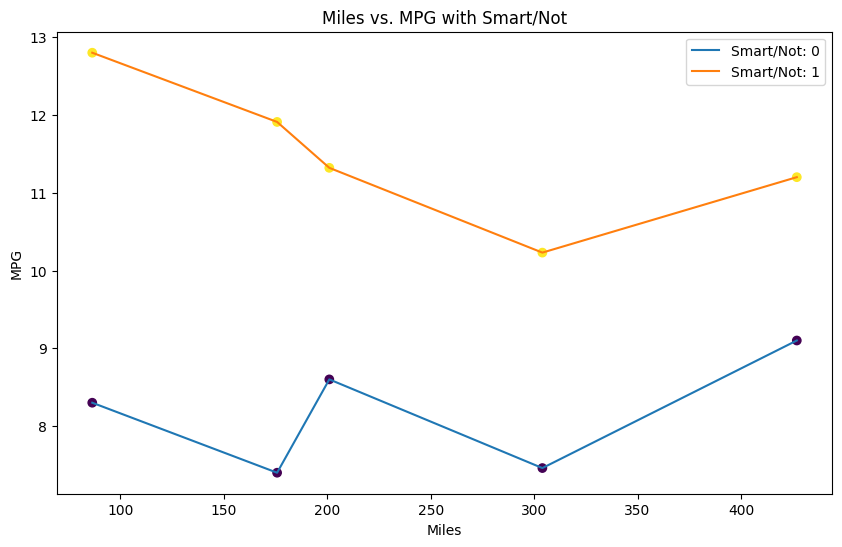

In [ ]:
# prompt: Visualize the miles and MPG scatterplot with lines from df_experiment, use smart/not=1 and smart/not=0

# Create a scatter plot with lines for smart/not=1 and smart/not=0
plt.figure(figsize=(10, 6))
plt.scatter(df_experiment['Miles'], df_experiment['MPG'], c=df_experiment['Smart/not'], cmap='viridis')
plt.xlabel('Miles')
plt.ylabel('MPG')
plt.title('Miles vs. MPG with Smart/Not')

# Add lines for smart/not=1 and smart/not=0
for smart_not in [0, 1]:
    subset = df_experiment[df_experiment['Smart/not'] == smart_not]
    plt.plot(subset['Miles'], subset['MPG'], label=f'Smart/Not: {smart_not}')

plt.legend()
plt.show()

#Cost Calculation

##Median and Estimation Interval

Other than using median, we will also use estimation interval, which is more accurate than using median


The confidence interval for the population mean can be estimated using the following formula:

$\bar{x} \pm t_{\alpha/2, n-1} \frac{s}{\sqrt{n}}$


where $\bar{x}$ is the sample mean, $t_{\alpha/2, n-1}$ is the critical value from the t-distribution, $s$ is the sample standard deviation, and $n$ is the sample size.

##Confidence Interval Method

In [ ]:
# prompt: use confidence estimation interval for df_experiment MPG for smart 1 and 0

import numpy as np

# Separate data for Smart 1 and Smart 0
df_smart1 = df_experiment[df_experiment['Smart/not'] == 1]['MPG']
df_smart0 = df_experiment[df_experiment['Smart/not'] == 0]['MPG']

# Calculate the confidence interval for Smart 1
confidence_level = 0.95  # 95% confidence level
degrees_of_freedom = len(df_smart1) - 1
sample_mean_smart1 = np.mean(df_smart1)
sample_std_smart1 = np.std(df_smart1, ddof=1)  # ddof=1 for sample standard deviation
margin_of_error_smart1 = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom) * sample_std_smart1 / np.sqrt(len(df_smart1))
confidence_interval_smart1 = (sample_mean_smart1 - margin_of_error_smart1, sample_mean_smart1 + margin_of_error_smart1)

# Calculate the confidence interval for Smart 0
degrees_of_freedom = len(df_smart0) - 1
sample_mean_smart0 = np.mean(df_smart0)
sample_std_smart0 = np.std(df_smart0, ddof=1)  # ddof=1 for sample standard deviation
margin_of_error_smart0 = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom) * sample_std_smart0 / np.sqrt(len(df_smart0))
confidence_interval_smart0 = (sample_mean_smart0 - margin_of_error_smart0, sample_mean_smart0 + margin_of_error_smart0)

print(f"Confidence Interval for Smart 1 MPG: {confidence_interval_smart1}")
print(f"Confidence Interval for Smart 0 MPG: {confidence_interval_smart0}")


Confidence Interval for Smart 1 MPG: (10.315186784581448, 12.668813215418554)
Confidence Interval for Smart 0 MPG: (7.258790104783804, 9.085209895216197)


##Seperate Dataframes

We seperate the dataframes for easier reading

In [ ]:
df_lanes_weight_interval = df_lanes_weight.copy()

##Median and Interval Calculation

Smart truck trailer Miles per gallon, mean, top interval, and bottom interval

In [ ]:
df_lanes_weight['Smart MPG'] = df_experiment.loc[df_experiment['Smart/not'] == 1, 'MPG'].mean()
df_lanes_weight_interval['Smart MPG top interval'] = confidence_interval_smart1[0]
df_lanes_weight_interval['Smart MPG lower interval'] = confidence_interval_smart1[1]

diesel truck trailer Miles per gallon, mean, top interval, and bottom interval

In [ ]:
df_lanes_weight['Diesel MPG'] = df_experiment.loc[df_experiment['Smart/not'] == 0, 'MPG'].mean()
df_lanes_weight_interval['Diesel MPG top interval'] = confidence_interval_smart0[0]
df_lanes_weight_interval['Diesel MPG lower interval'] = confidence_interval_smart0[1]

We will count how many gas are consumed in each trip by dividing the miles and the MPG

In [ ]:
df_lanes_weight['Diesel Gas Consumed with Diesel Engine'] = df_lanes_weight['Miles'] / df_lanes_weight['Diesel MPG']
df_lanes_weight_interval['Diesel Gas Consumed with Diesel Engine top interval'] = df_lanes_weight_interval['Miles'] / df_lanes_weight_interval['Diesel MPG top interval']
df_lanes_weight_interval['Diesel Gas Consumed with Diesel Engine bottom interval'] = df_lanes_weight_interval['Miles'] / df_lanes_weight_interval['Diesel MPG lower interval']

In [ ]:
df_lanes_weight['Diesel Gas Consumed with Smart Trailer'] = df_lanes_weight['Miles'] / df_lanes_weight['Smart MPG']
df_lanes_weight_interval['Diesel Gas Consumed with Smart Trailer top interval'] = df_lanes_weight_interval['Miles'] / df_lanes_weight_interval['Smart MPG top interval']
df_lanes_weight_interval['Diesel Gas Consumed with Smart Trailer bottom interval'] = df_lanes_weight_interval['Miles'] / df_lanes_weight_interval['Smart MPG lower interval']

based on our search, average gas diesel price in 2023 in $4.21. to count the total cost of using diesel we will multiply the gas consumed and the gas price

In [ ]:
df_lanes_weight['Average Gas Diesel Price 2023'] = 4.21
df_lanes_weight_interval['Average Gas Diesel Price 2023'] = 4.21
df_lanes_weight['Total Cost Diesel'] = df_lanes_weight['Diesel Gas Consumed with Diesel Engine'] * df_lanes_weight['Average Gas Diesel Price 2023']
df_lanes_weight_interval['Total Cost Diesel top interval'] = df_lanes_weight_interval['Diesel Gas Consumed with Diesel Engine top interval'] * df_lanes_weight_interval['Average Gas Diesel Price 2023']
df_lanes_weight_interval['Total Cost Diesel bottom interval'] = df_lanes_weight_interval['Diesel Gas Consumed with Diesel Engine bottom interval'] * df_lanes_weight_interval['Average Gas Diesel Price 2023']

In [ ]:
df_lanes_weight['Total Cost Smart'] = df_lanes_weight['Diesel Gas Consumed with Smart Trailer'] * df_lanes_weight['Average Gas Diesel Price 2023']
df_lanes_weight_interval['Total Cost Smart top interval'] = df_lanes_weight_interval['Diesel Gas Consumed with Smart Trailer top interval'] * df_lanes_weight_interval['Average Gas Diesel Price 2023']
df_lanes_weight_interval['Total Cost Smart bottom interval'] = df_lanes_weight_interval['Diesel Gas Consumed with Smart Trailer bottom interval'] * df_lanes_weight_interval['Average Gas Diesel Price 2023']

to count how many we saved if we transitioned to smart trailers, we will substract total cost using diesel with total cost using smart trailer

In [ ]:
df_lanes_weight['Cost Saved'] = df_lanes_weight['Total Cost Diesel'] - df_lanes_weight['Total Cost Smart']
df_lanes_weight_interval['Cost Saved top interval'] = df_lanes_weight_interval['Total Cost Diesel top interval'] - df_lanes_weight_interval['Total Cost Smart top interval']
df_lanes_weight_interval['Cost Saved bottom interval'] = df_lanes_weight_interval['Total Cost Diesel bottom interval'] - df_lanes_weight_interval['Total Cost Smart bottom interval']

Finally, we will count how much in percent we could save, by counting the percentage between the cost saved and total cost

In [ ]:
df_lanes_weight['Percentage Saved'] = df_lanes_weight['Cost Saved'] / df_lanes_weight['Total Cost Diesel'] * 100
df_lanes_weight_interval['Percentage Saved top interval'] = df_lanes_weight_interval['Cost Saved top interval'] / df_lanes_weight_interval['Total Cost Diesel top interval'] * 100
df_lanes_weight_interval['Percentage Saved bottom interval'] = df_lanes_weight_interval['Cost Saved bottom interval'] / df_lanes_weight_interval['Total Cost Diesel bottom interval'] * 100

check the result

In [ ]:
df_lanes_weight.head()

,Calendar Year,Actual Date,Load Number,Weight Received,Cubic,Order Type,Location Lane,"City, State Lane",State,City,...,Miles,Smart MPG,Diesel MPG,Diesel Gas Consumed with Diesel Engine,Diesel Gas Consumed with Smart Trailer,Average Gas Diesel Price 2023,Total Cost Diesel,Total Cost Smart,Cost Saved,Percentage Saved
0,2023,2023-01-02,8872378,42529.05,1627.2585,Outbound,DOT FOODS - TN - PON FOOD CORP.,"Dyersburg, TN - Ponchatoula, LA",TN,Dyersburg,...,419.0,11.492,8.172,51.272638,36.460146,4.21,215.857807,153.497215,62.360592,28.889662
1,2023,2023-01-02,8872378,42529.05,1627.2585,Outbound,MEYERS WAREHOUSE - DOT FOODS - TN,"New Orleans, LA - Dyersburg, TN",LA,New Orleans,...,482.0,11.492,8.172,58.981889,41.942221,4.21,248.313754,176.576749,71.737005,28.889662
2,2023,2023-01-02,8872378,42529.05,1627.2585,Outbound,PON FOOD CORP. - MEYERS WAREHOUSE,"Ponchatoula, LA - New Orleans, LA",LA,Ponchatoula,...,51.0,11.492,8.172,6.240822,4.437870,4.21,26.273862,18.683432,7.590430,28.889662
3,2023,2023-01-02,8871180,42398.26,1580.5559,Outbound,BUSH BROTHERS & CO - DOT FOODS - IL,"Dandridge, TN - Mount Sterling, IL",TN,Dandridge,...,632.0,11.492,8.172,77.337249,54.994779,4.21,325.589819,231.528019,94.061799,28.889662
4,2023,2023-01-02,8871180,42398.26,1580.5559,Outbound,DOT FOODS - IN - USF/KNOXVILLE,"Cambridge City, IN - Alcoa, TN",IN,Cambridge City,...,337.0,11.492,8.172,41.238375,29.324748,4.21,173.613558,123.457188,50.156371,28.889662


In [ ]:
df_lanes_weight_interval.head()

,Calendar Year,Actual Date,Load Number,Weight Received,Cubic,Order Type,Location Lane,"City, State Lane",State,City,...,Diesel Gas Consumed with Smart Trailer bottom interval,Average Gas Diesel Price 2023,Total Cost Diesel top interval,Total Cost Diesel bottom interval,Total Cost Smart top interval,Total Cost Smart bottom interval,Cost Saved top interval,Cost Saved bottom interval,Percentage Saved top interval,Percentage Saved bottom interval
0,2023,2023-01-02,8872378,42529.05,1627.2585,Outbound,DOT FOODS - TN - PON FOOD CORP.,"Dyersburg, TN - Ponchatoula, LA",TN,Dyersburg,...,33.073343,4.21,243.014328,194.160622,171.009022,139.238772,72.005306,54.921849,29.630066,28.286812
1,2023,2023-01-02,8872378,42529.05,1627.2585,Outbound,MEYERS WAREHOUSE - DOT FOODS - TN,"New Orleans, LA - Dyersburg, TN",LA,New Orleans,...,38.046184,4.21,279.553475,223.354223,196.721595,160.174435,82.831880,63.179788,29.630066,28.286812
2,2023,2023-01-02,8872378,42529.05,1627.2585,Outbound,PON FOOD CORP. - MEYERS WAREHOUSE,"Ponchatoula, LA - New Orleans, LA",LA,Ponchatoula,...,4.025634,4.21,29.579310,23.632916,20.814941,16.947917,8.764369,6.684998,29.630066,28.286812
3,2023,2023-01-02,8871180,42398.26,1580.5559,Outbound,BUSH BROTHERS & CO - DOT FOODS - IL,"Dandridge, TN - Mount Sterling, IL",TN,Dandridge,...,49.886283,4.21,366.551445,292.862799,257.942009,210.021251,108.609436,82.841548,29.630066,28.286812
4,2023,2023-01-02,8871180,42398.26,1580.5559,Outbound,DOT FOODS - IN - USF/KNOXVILLE,"Cambridge City, IN - Alcoa, TN",IN,Cambridge City,...,26.600755,4.21,195.455438,156.162600,137.541862,111.989180,57.913576,44.173420,29.630066,28.286812


##Average Cost Saved and Percentage Saved

Now we need to count many dollars we saved in each trip and how much is in percentage when compared to not using smart trailer

In [ ]:
average_cost_saved = df_lanes_weight['Cost Saved'].mean()
average_cost_saved_top_interval = df_lanes_weight_interval['Cost Saved top interval'].mean()
average_cost_saved_bottom_interval = df_lanes_weight_interval['Cost Saved bottom interval'].mean()
average_percentage_saved = df_lanes_weight['Percentage Saved'].mean()
average_percentage_saved_top_interval = df_lanes_weight_interval['Percentage Saved top interval'].mean()
average_percentage_saved_bottom_interval = df_lanes_weight_interval['Percentage Saved bottom interval'].mean()

In [ ]:
print("Average Cost Saved:", round(average_cost_saved), "Dollars per trip")
print("Average Percentage Saved:", round(average_percentage_saved,2), "% per trip")

Average Cost Saved: 29 Dollars per trip
Average Percentage Saved: 28.89 % per trip


In [ ]:
print("Average Cost Saved at least will be", round(average_cost_saved_bottom_interval), "to", round(average_cost_saved_top_interval), "Dollars per trip")
print("Average Percentage Saved at least will be", round(average_percentage_saved_bottom_interval,2), "to", round(average_percentage_saved_top_interval,2), "% per trip")

Average Cost Saved at least will be 26 to 34 Dollars per trip
Average Percentage Saved at least will be 28.29 to 29.63 % per trip


the result is smart trailer will saved 85 dollars in each trip and at least 75 dollars. Percentage wise, it will saved almost 29% in each trip and at least 28%

Next we will calculate how much money we could potentially saved by summing the 2023 cost saved in each trip

##Cost Saved Anually

In [ ]:
sum_cost_saved = df_lanes_weight['Cost Saved'].sum()
sum_cost_saved_top_interval = df_lanes_weight_interval['Cost Saved top interval'].sum()
sum_cost_saved_bottom_interval = df_lanes_weight_interval['Cost Saved bottom interval'].sum()

In [ ]:
formatted_number = "{:,.2f}".format(round(sum_cost_saved, 2))
formatted_number_top_interval = "{:,.2f}".format(round(sum_cost_saved_top_interval, 2))
formatted_number_bottom_interval = "{:,.2f}".format(round(sum_cost_saved_bottom_interval, 2))

In [ ]:
print("Sum of Cost Saved:", formatted_number, "Dollars each year")
print("Sum of Cost Saved will be at least", formatted_number_bottom_interval, "to", formatted_number_top_interval, "Dollars each year")

Sum of Cost Saved: 20,579,569.75 Dollars each year
Sum of Cost Saved will be at least 18,124,716.17 to 23,762,414.47 Dollars each year


If all trucks were trantioned to smart trailer, it Annually will saved 22 million and at least 19 million.

In [ ]:
df_lanes_weight.to_excel('df_lanes_weight.xlsx', index=False)

In [ ]:
df_lanes_weight_interval.to_excel('df_lanes_weight_interval.xlsx', index=False)

#Regression method

##Regression of MPG from experiment

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Define the dependent variable (y) and independent variables (X)
y = df_experiment['MPG']
X = df_experiment.drop(['MPG', 'Fuel Used (gallons)'], axis=1)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the XGBoost model for regression
model = XGBRegressor(objective='reg:squarederror', booster='gblinear')
# Train the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 0.1641566893337482


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import statsmodels.api as sm

# Assuming 'selected_features' contains important features from XGBoost
X_selected = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_selected).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     10.98
Date:                Mon, 21 Oct 2024   Prob (F-statistic):             0.0148
Time:                        20:46:37   Log-Likelihood:                -9.7749
No. Observations:                   8   AIC:                             25.55
Df Residuals:                       5   BIC:                             25.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5787      0.094      6.174      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
df_lanes_weight_smart = df_lanes_weight.copy()
df_lanes_weight_diesel = df_lanes_weight.copy()
df_lanes_weight_smart['Weight'] = df_lanes_weight_smart['Weight Received']
df_lanes_weight_diesel['Weight'] = df_lanes_weight_diesel['Weight Received']
df_lanes_weight_smart['Smart/not'] = 1
df_lanes_weight_diesel['Smart/not'] = 0

In [ ]:
X_smart = df_lanes_weight_smart[['Miles', 'Weight', 'Smart/not']]
X_diesel = df_lanes_weight_diesel[['Miles', 'Weight', 'Smart/not']]
y_pred_smart = model.predict(X_smart)
y_pred_diesel = model.predict(X_diesel)
df_lanes_weight_smart['MPG_Smart'] = y_pred_smart
df_lanes_weight_smart['MPG_Diesel'] = y_pred_diesel

In [ ]:
df_lanes_weight_smart['Diesel Gas Consumed with smart'] = df_lanes_weight_smart['Miles'] / df_lanes_weight_smart['MPG_Smart']
df_lanes_weight_smart['Diesel Gas Consumed with diesel'] = df_lanes_weight_smart['Miles'] / df_lanes_weight_smart['MPG_Diesel']

In [ ]:
df_lanes_weight_smart['Average Gas Diesel Price 2023'] = 4.21
df_lanes_weight_smart['Total Cost smart'] = df_lanes_weight_smart['Diesel Gas Consumed with smart'] * df_lanes_weight_smart['Average Gas Diesel Price 2023']
df_lanes_weight_smart['Total Cost diesel'] = df_lanes_weight_smart['Diesel Gas Consumed with diesel'] * df_lanes_weight_smart['Average Gas Diesel Price 2023']
df_lanes_weight_smart['Cost Saved'] = df_lanes_weight_smart['Total Cost diesel'] - df_lanes_weight_smart['Total Cost smart']
df_lanes_weight_smart['Percentage Saved'] = df_lanes_weight_smart['Cost Saved'] / df_lanes_weight_smart['Total Cost Diesel'] * 100

In [ ]:
average_cost_saved_linreg = df_lanes_weight_smart['Cost Saved'].mean()
average_percentage_saved_linreg = df_lanes_weight_smart['Percentage Saved'].mean()
print("Average Cost Saved:", round(average_cost_saved_linreg), "Dollars per trip")
print("Average Percentage Saved:", round(average_percentage_saved_linreg,2), "% per trip")

Average Cost Saved: 29 Dollars per trip
Average Percentage Saved: 25.57 % per trip


In [ ]:
sum_cost_saved_linreg = df_lanes_weight_smart['Cost Saved'].sum()
formatted_number_linreg = "{:,.2f}".format(round(sum_cost_saved_linreg, 2))
print("Sum of Cost Saved:", formatted_number_linreg, "Dollars each year")

Sum of Cost Saved: 20,714,905.19 Dollars each year


#How Many Trucks Should be Electric

In [ ]:
df_lanes_weight_filtered = df_lanes_weight[(df_lanes_weight['Miles'] < 180) & (df_lanes_weight['Weight Received'] < 39000)]

In [ ]:
df_lanes_weight_filtered.head()

,Calendar Year,Actual Date,Load Number,Weight Received,Cubic,Order Type,Location Lane,"City, State Lane",Miles,Smart MPG,Diesel MPG,Diesel Gas Consumed with Diesel Engine,Diesel Gas Consumed with Smart Trailer,Average Gas Diesel Price 2023,Total Cost Diesel,Total Cost Smart,Cost Saved,Percentage Saved
218,2023,2023-01-02,8872032,38913.62,1410.2098,Outbound,"CARIBBEAN FOODSERVICE,INC - JOLLYS PHARMACY/TR...","Miami, FL - Medley, FL",17.0,11.492,8.172,2.080274,1.479290,4.21,8.757954,6.227811,2.530143,28.889662
221,2023,2023-01-02,8872032,38913.62,1410.2098,Outbound,JOLLYS PHARMACY/TROPICAL - FREEDOM FRESH,"Medley, FL - Medley, FL",4.0,11.492,8.172,0.489476,0.348068,4.21,2.060695,1.465367,0.595328,28.889662
222,2023,2023-01-02,8871708,38907.18,2025.4792,Outbound,DOT FOODS - OK - GROCERY SUPPLY/SULPHUR SP,"Ardmore, OK - Sulphur Springs, TX",154.0,11.492,8.172,18.844836,13.400627,4.21,79.336760,56.416638,22.920122,28.889662
223,2023,2023-01-02,8871708,38907.18,2025.4792,Outbound,GROCERY SUPPLY/SULPHUR SP - WHITEWAVE FOODS,"Sulphur Springs, TX - Arlington, TX",96.0,11.492,8.172,11.747430,8.353637,4.21,49.456681,35.168813,14.287868,28.889662
224,2023,2023-01-02,8871708,38907.18,2025.4792,Outbound,WHITEWAVE FOODS - DOT FOODS - OK,"Arlington, TX - Ardmore, OK",110.0,11.492,8.172,13.460597,9.571876,4.21,56.669114,40.297598,16.371516,28.889662


In [ ]:
# prompt: count how many rows in df_lanes_weight_filtered and compared them the total rows of df_lanes_weight

rows_filtered = df_lanes_weight_filtered.shape[0]
rows_total = df_lanes_weight.shape[0]

print(f"Rows in df_lanes_weight_filtered: {rows_filtered}")
print(f"Rows in df_lanes_weight: {rows_total}")
print(f"Percentage of rows filtered: {(rows_filtered / rows_total) * 100:.2f}%")

Rows in df_lanes_weight_filtered: 389008
Rows in df_lanes_weight: 705193
Percentage of rows filtered: 55.16%


55% of all deliveries are being handled by 55% of the trucks. However, there are 2700 trailers and 2100 Trucks, which means only 2100 trailers are being used. Instead ofIf 55% of the trailers are being transitioned, there are probability of trailers that are will not be used, since only 2100 trucks available. to make sure all of the trucks

#Next Step

Every team member should try to find insights with any tools they are comfortable with(excel, R, Tableau, ect) it doesnt have to be complecated.

for example haiyang proposes we show a line graph of diesel gas MPG with miles as an x axis. which would show how the efficiency will decline as the truck drive further  

Other example comes from andrew. He proposes we should show a line chart which shows the number of trucks trantioned to electric trailer with the cost as the y axis. Which would show, as more trucks are trantioned to electric trailer, it would cost more. Hence, we could determine when to stop trantioning

another example came from daniel. He proposes we calculate the break even point. We should count how much it cost to trantition truck trailers(based on andrew calculation) and divided it by profit each year. As a result, we know how long it will take to achieve a break even point if we trantioned some trucks to electric trailer

Dont worry if you do it on other tools than Python, we could later translate it from the tools you used to python